# 必要なライブラリをimport

In [43]:
import itertools

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 3D-PCRの変数を定義

In [44]:
sample_size = (12, 8, 10)
lambda_param = 200

## 実際のデータを使う用

In [45]:
mode = 'real data'

# ここから指定するときは0-indexed
positives = [(0, 0, 0)]

c_x = [0]
c_y = [0]
c_z = [1]
re_test = list(itertools.product(c_x, c_y, c_z))
re_test_index = [j + i*sample_size[1] + sample_size[0]*sample_size[1]*k for i, j, k in re_test]

## シミュレーション用(Ramdom)

In [46]:
arr = np.random.exponential(scale=1/lambda_param, size=(12, 8, 10))

rand = np.random.rand(12, 8, 10)
samples = rand < arr

# positiveの(x, y, z)を取得
indices = np.nonzero(samples)
positives = [(indices[0][i], indices[1][i], indices[2][i]) for i in range(len(indices[0]))]

# positiveになる層のindexを取得
c_x = np.where(np.any(samples, axis = (1, 2)))[0].tolist()
c_y = np.where(np.any(samples, axis = (0, 2)))[0].tolist()
c_z = np.where(np.any(samples, axis = (0, 1)))[0].tolist()
re_test = list(itertools.product(c_x, c_y, c_z))
re_test_index = [j + i*sample_size[1] + sample_size[0]*sample_size[1]*k for i, j, k in re_test]


# better_Arrangement
sorted_arr = np.flip(np.sort(np.sort(arr.reshape(1, 960)).reshape(10,8,12).T, axis = 0).reshape(12, 8, 10))
arranged_rand = np.zeros(sample_size)

for i in range(sample_size[0]):
    for j in range(sample_size[1]):
        for k in range(sample_size[2]):
            loc = np.where(sorted_arr == arr[i][j][k])
            x, y, z = loc[0][0], loc[1][0], loc[2][0]
            arranged_rand[x][y][z] = rand[i][j][k]

arranged_samples = arranged_rand < sorted_arr
indices = np.nonzero(arranged_samples)
arranged_positives = [(indices[0][i], indices[1][i], indices[2][i]) for i in range(len(indices[0]))]

c_x = np.where(np.any(arranged_samples, axis = (1, 2)))[0].tolist()
c_y = np.where(np.any(arranged_samples, axis = (0, 2)))[0].tolist()
c_z = np.where(np.any(arranged_samples, axis = (0, 1)))[0].tolist()
re_test_arranged = list(itertools.product(c_x, c_y, c_z))
re_test_arranged_index = [j + i*sample_size[1] + sample_size[0]*sample_size[1]*k for i, j, k in re_test_arranged]

## 再検査が必要なsample数

In [36]:
f'{len(re_test)}→{len(re_test_arranged)}'

'80→60'

# 可視化

## positiveなsampleの位置を可視化

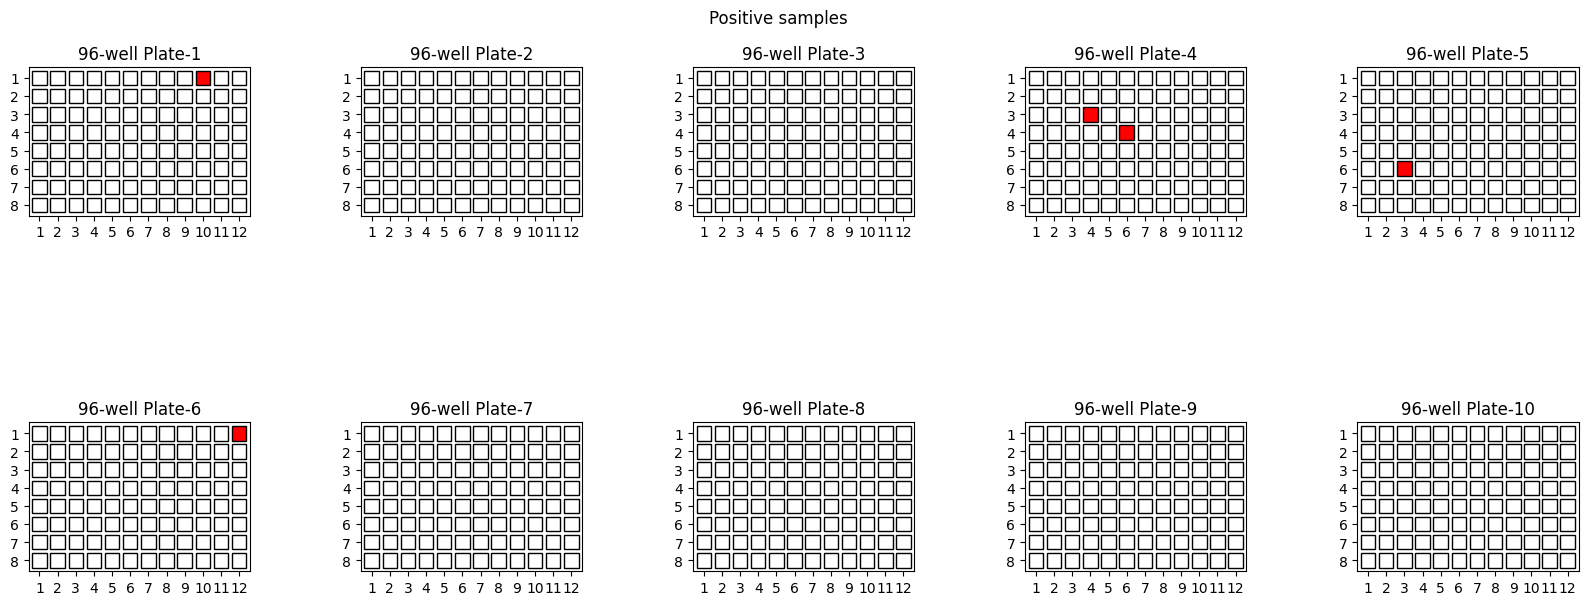

In [40]:
fig = plt.figure(figsize=(20, 20))
cnt = 0

for well_number in range(sample_size[2]):
    ax = fig.add_subplot(2, 5, well_number+1)
    well_size = 0.8
    
    for i in range(sample_size[0]):
        for j in range(sample_size[1]):
            if (i, j, well_number) in positives:
                color = 'red'
            else:
                color = 'white'
            rect = patches.Rectangle((i+0.1, 7-j+0.1), well_size, well_size, linewidth=1, edgecolor='black', facecolor=color)
            ax.add_patch(rect)

    
    ax.set_xticks([i + 0.5 for i in range(12)])
    ax.set_xticklabels([str(i + 1) for i in range(12)])
    
    ax.set_yticks([i + 0.5 for i in range(8)])
    ax.set_yticklabels([str(i + 1) for i in range(8)][::-1])
    
    ax.set_xlim(-0.1, 12.1)
    ax.set_ylim(-0.1, 8.1)
    
    ax.set_aspect('equal', 'box')
    
    ax.set_title(f'{sample_size[0] * sample_size[1]}-well Plate-{well_number+1}')

fig.suptitle('Positive samples', y=0.65)
fig.subplots_adjust(wspace=0.5, hspace=-0.7)

## 再検査が必要な well を可視化

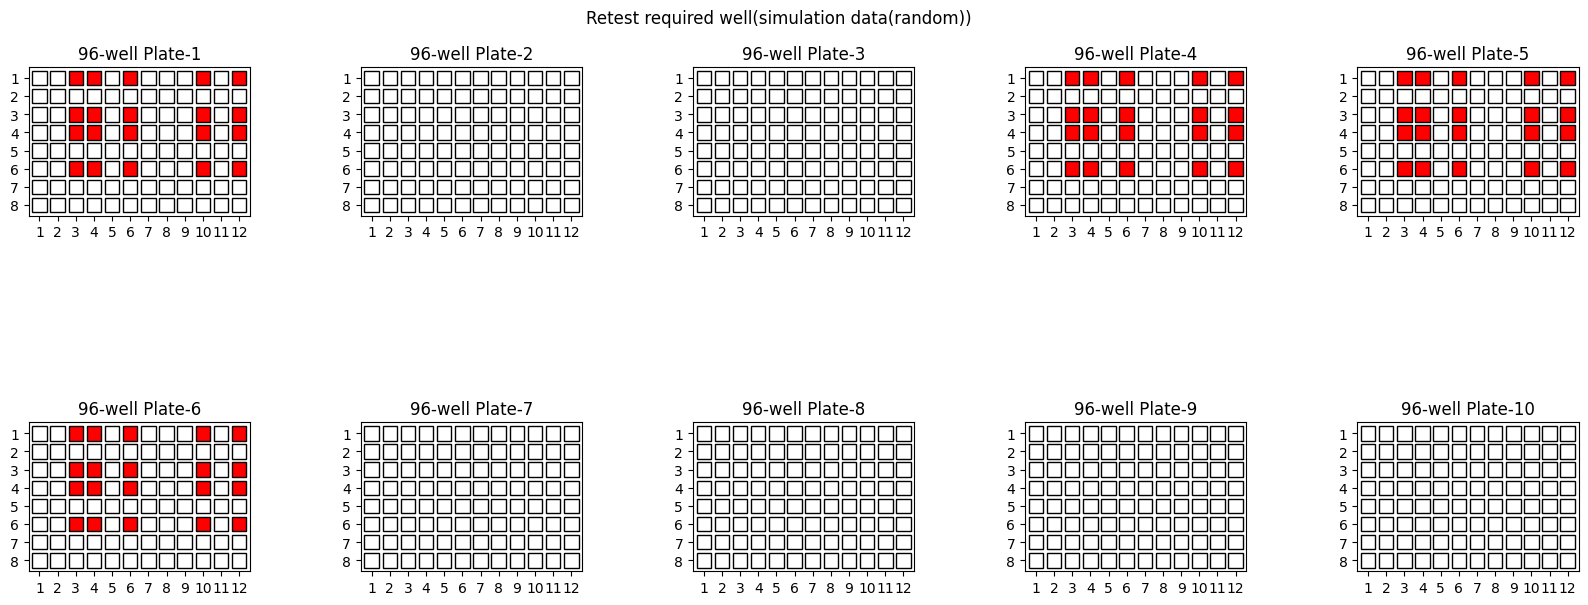

In [41]:
mode = 'simulation data(random)'

fig = plt.figure(figsize=(20, 20))
cnt = 0

for well_number in range(sample_size[2]):
    ax = fig.add_subplot(2, 5, well_number+1)
    well_size = 0.8
    
    for i in range(sample_size[0]):
        for j in range(sample_size[1]):
            if cnt in re_test_index:
                color = 'red'
            else:
                color = 'white'
            rect = patches.Rectangle((i+0.1, 7-j+0.1), well_size, well_size, linewidth=1, edgecolor='black', facecolor=color)
            ax.add_patch(rect)

            cnt += 1
    
    ax.set_xticks([i + 0.5 for i in range(12)])
    ax.set_xticklabels([str(i + 1) for i in range(12)])
    
    ax.set_yticks([i + 0.5 for i in range(8)])
    ax.set_yticklabels([str(i + 1) for i in range(8)][::-1])  # Y軸のラベルは逆順
    
    ax.set_xlim(-0.1, 12.1)
    ax.set_ylim(-0.1, 8.1)
    
    ax.set_aspect('equal', 'box')
    
    ax.set_title(f'{sample_size[0] * sample_size[1]}-well Plate-{well_number+1}')

fig.suptitle(f'Retest required well({mode})', y=0.65)
fig.subplots_adjust(wspace=0.5, hspace=-0.7)

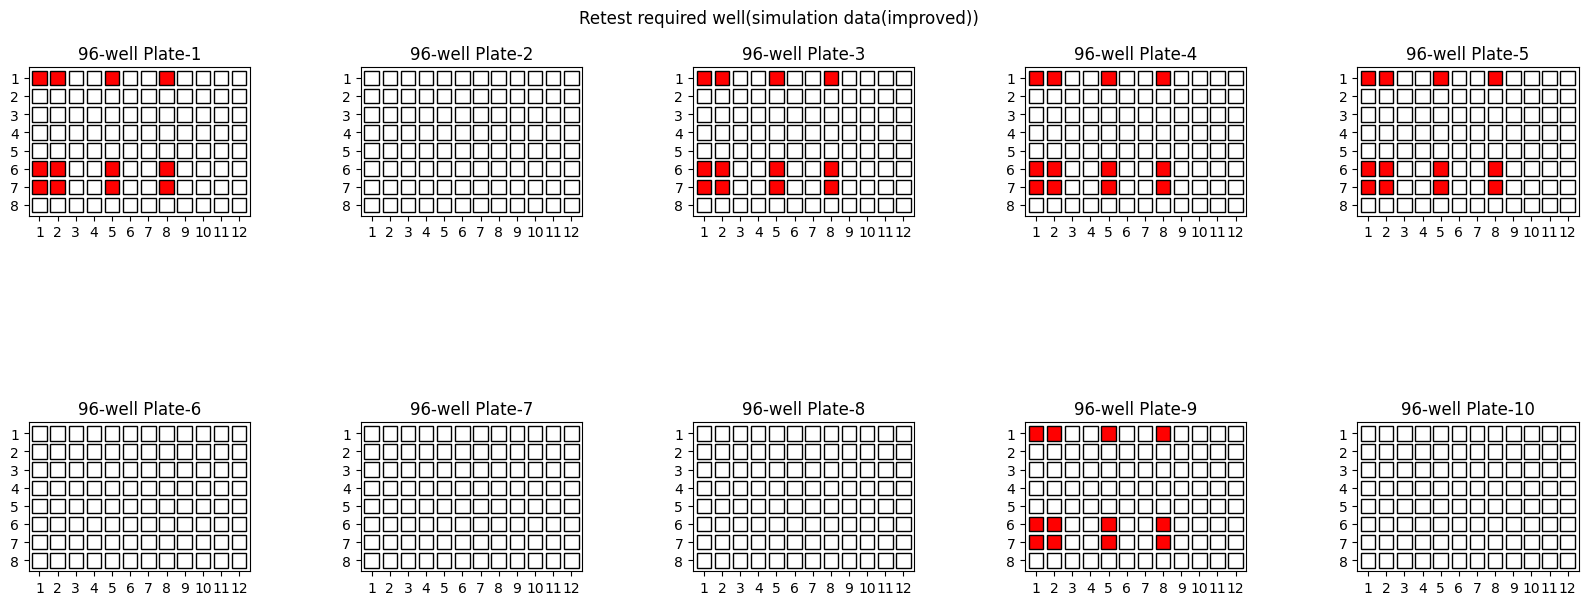

In [42]:
mode = 'simulation data(improved)'

fig = plt.figure(figsize=(20, 20))
cnt = 0

for well_number in range(sample_size[2]):
    ax = fig.add_subplot(2, 5, well_number+1)
    well_size = 0.8
    
    for i in range(sample_size[0]):
        for j in range(sample_size[1]):
            if cnt in re_test_arranged_index:
                color = 'red'
            else:
                color = 'white'
            rect = patches.Rectangle((i+0.1, 7-j+0.1), well_size, well_size, linewidth=1, edgecolor='black', facecolor=color)
            ax.add_patch(rect)

            cnt += 1
    
    ax.set_xticks([i + 0.5 for i in range(12)])
    ax.set_xticklabels([str(i + 1) for i in range(12)])
    
    ax.set_yticks([i + 0.5 for i in range(8)])
    ax.set_yticklabels([str(i + 1) for i in range(8)][::-1])  # Y軸のラベルは逆順
    
    ax.set_xlim(-0.1, 12.1)
    ax.set_ylim(-0.1, 8.1)
    
    ax.set_aspect('equal', 'box')
    
    ax.set_title(f'{sample_size[0] * sample_size[1]}-well Plate-{well_number+1}')

fig.suptitle(f'Retest required well({mode})', y=0.65)
fig.subplots_adjust(wspace=0.5, hspace=-0.7)

In [9]:
x = np.arange(12).reshape(2,2,3)
y = np.flip(np.sort(np.arange(12).reshape(3,2,2).T, axis = 0).reshape(2, 2, 3))
x, y

(array([[[ 0,  1,  2],
         [ 3,  4,  5]],
 
        [[ 6,  7,  8],
         [ 9, 10, 11]]]),
 array([[[11,  7,  3],
         [ 9,  5,  1]],
 
        [[10,  6,  2],
         [ 8,  4,  0]]]))

In [10]:
# np.sort(np.arange(960).reshape(10,8,12).T, axis = 0)

np.flip(np.sort(np.sort(np.random.randint(0, 960, (12,8,10)).reshape(1, 960)).reshape(10,8,12).T.reshape(96, 10), axis = 0).reshape(12, 8, 10))

array([[[959, 864, 772, 686, 576, 486, 402, 287, 183,  93],
        [959, 864, 772, 684, 576, 486, 399, 287, 182,  91],
        [957, 862, 770, 682, 576, 485, 399, 285, 182,  91],
        [956, 860, 767, 681, 576, 485, 399, 284, 181,  90],
        [955, 859, 764, 680, 575, 483, 397, 284, 178,  89],
        [955, 859, 764, 680, 575, 483, 397, 283, 178,  88],
        [955, 857, 764, 680, 573, 482, 395, 280, 177,  88],
        [955, 856, 763, 676, 572, 482, 391, 279, 176,  87]],

       [[953, 855, 762, 672, 571, 481, 391, 277, 176,  86],
        [953, 855, 762, 672, 570, 481, 390, 277, 174,  86],
        [952, 854, 761, 667, 568, 480, 389, 276, 174,  86],
        [952, 852, 761, 666, 568, 480, 383, 276, 173,  84],
        [949, 852, 760, 665, 567, 480, 381, 276, 172,  83],
        [949, 852, 760, 662, 565, 479, 380, 275, 171,  82],
        [949, 851, 759, 661, 565, 478, 380, 270, 171,  81],
        [948, 850, 759, 660, 562, 478, 379, 268, 171,  80]],

       [[948, 850, 758, 659, 562, 47

In [205]:
np.sort(np.random.randint(0, 960, (10,8,12)).T, axis = 0).reshape(12, 8, 10)


array([[[521, 177, 374, 266, 714,  87,  94, 113,  89, 489],
        [833, 941, 904, 879, 753, 881, 263, 448,  41, 914],
        [457, 673, 616,  52, 144, 315, 492, 806, 722, 773],
        [397, 858, 385, 221, 678, 136, 463, 928, 682,  67],
        [178,  68, 325, 184, 460, 792,  77, 345, 788, 566],
        [ 41, 857, 111, 818, 904,  92, 694, 381, 465, 327],
        [906, 387, 484, 333, 710, 859, 352, 413, 518, 533],
        [313, 686, 745, 506, 481, 381, 881,  42, 910, 325]],

       [[569, 528, 312, 658, 510, 217,  12, 587, 253, 761],
        [336, 697, 300, 268, 785, 151,  55, 290, 182, 474],
        [887, 288, 203, 306,   4, 742, 500,   9, 114, 689],
        [635, 210, 244, 824, 494, 431, 604, 737, 453, 927],
        [337,  56, 673, 751, 787, 159, 914, 250, 409, 667],
        [846,  98, 342,  80, 614, 384, 407, 172, 288, 440],
        [566,  82, 130, 455, 622, 661, 240, 669, 700, 845],
        [ 30, 188,  63, 206, 602, 354, 349, 468, 331, 482]],

       [[887,  92, 624, 818, 238, 64

array([[  1,   2,   2,   3,   4,   5,   7,   8,  10,  11,  12,  13,  14,
         15,  17,  18,  18,  20,  21,  22,  23,  28,  28,  29,  30,  30,
         31,  32,  32,  32,  33,  33,  37,  37,  37,  38,  38,  38,  41,
         41,  42,  43,  44,  44,  44,  44,  46,  46,  47,  48,  48,  49,
         50,  52,  53,  53,  53,  55,  56,  56,  56,  56,  56,  57,  58,
         58,  62,  62,  65,  68,  69,  69,  70,  70,  71,  71,  73,  73,
         74,  75,  80,  81,  81,  83,  84,  85,  88,  89,  90,  91,  92,
         92,  93,  94,  95,  97,  98,  98,  99,  99, 102, 102, 106, 107,
        107, 108, 108, 108, 109, 110, 110, 110, 113, 115, 115, 115, 117,
        117, 118, 118, 118, 119, 119, 120, 122, 122, 122, 124, 124, 126,
        129, 130, 131, 133, 133, 138, 138, 138, 139, 140, 141, 142, 143,
        143, 143, 144, 146, 146, 146, 148, 148, 152, 153, 155, 157, 157,
        159, 160, 162, 162, 163, 165, 165, 166, 166, 168, 171, 173, 174,
        174, 175, 175, 175, 178, 178, 178, 179, 179